# Modelos  K-Nearest Neighbors (KNN)

In [1]:
#Importación de librearías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
datasmartgrid =pd.read_csv('../data/processed/dataSmartPreparada.csv')
datasmartgrid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [4]:
# Separar características (X) y etiqueta (y)
X = datasmartgrid.drop(columns=['stabf'])  # Eliminar la columna objetivo
y = datasmartgrid['stabf']  # Columna objetivo

In [5]:

# Dividir el dataset en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Escalador estándar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:

# Configuración hyper-parámetro 1: k=3, distancia euclidiana, ponderación uniforme
knn1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
knn1.fit(X_train_scaled, y_train)
y_pred1 = knn1.predict(X_test_scaled)
print("Configuración 1: k=3, euclidiana, uniforme")
print(confusion_matrix(y_test, y_pred1))
#print(classification_report(y_test, y_pred1))

Configuración 1: k=3, euclidiana, uniforme
[[7360  318]
 [ 365 3957]]


In [9]:
#Configuración hyper-parámetro 2: k=5, distancia manhattan, ponderación por distancia
knn2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn2.fit(X_train_scaled, y_train)
y_pred2 = knn2.predict(X_test_scaled)
print("Configuración 2: k=5, manhattan, ponderación por distancia")
print(confusion_matrix(y_test, y_pred2))
#print(classification_report(y_test, y_pred2))

Configuración 2: k=5, manhattan, ponderación por distancia
[[7503  175]
 [ 217 4105]]


In [10]:
# Configuración hyper-parámetro 3: k=7, distancia minkowski (p=3), ponderación uniforme
knn3 = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=3, weights='uniform')
knn3.fit(X_train_scaled, y_train)
y_pred3 = knn3.predict(X_test_scaled)
print("Configuración 3: k=7, minkowski (p=3), uniforme")
print(confusion_matrix(y_test, y_pred3))
#print(classification_report(y_test, y_pred3))

Configuración 3: k=7, minkowski (p=3), uniforme
[[7455  223]
 [ 405 3917]]


Configuración 1 (k=3, euclidiana, uniforme):

*Verdaderos positivos: 7360
*Falsos positivos: 365
*Verdaderos negativos: 3957
*Falsos negativos: 318

Configuración 2 (k=5, manhattan, ponderación por distancia):

*Verdaderos positivos: 7503
*Falsos positivos: 217
*Verdaderos negativos: 4105
*Falsos negativos: 175

Configuración 3 (k=7, minkowski p=3, uniforme):

*Verdaderos positivos: 7455
*Falsos positivos: 405
*Verdaderos negativos: 3917
*Falsos negativos: 223

Conclusión:
Configuración 2 (k=5, manhattan, ponderación por distancia) parece ser la mejor opción:

--Tiene el menor número de falsos positivos (217) y falsos negativos (175), lo que implica que el modelo está clasificando correctamente más casos. Presenta un mejor balance entre sensibilidad y precisión.

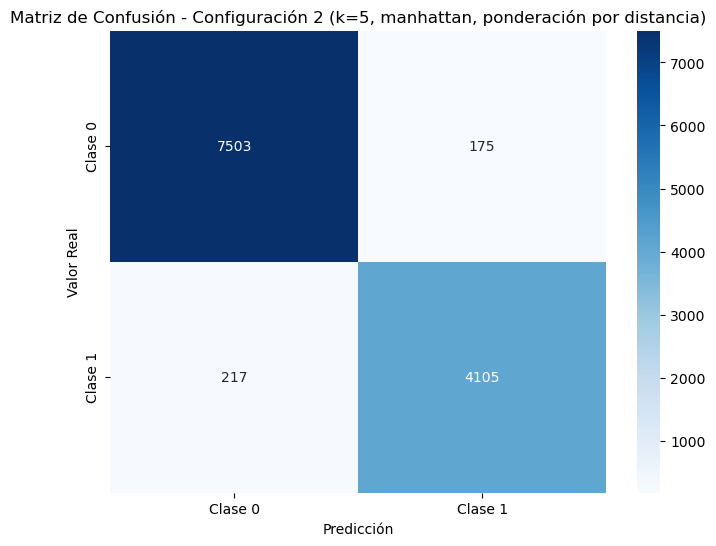

Reporte de Clasificación - Configuración 2
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7678
           1       0.96      0.95      0.95      4322

    accuracy                           0.97     12000
   macro avg       0.97      0.96      0.96     12000
weighted avg       0.97      0.97      0.97     12000



In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para la Configuración 2
cm = confusion_matrix(y_test, y_pred2)

# Reporte de clasificación para Configuración 2
report = classification_report(y_test, y_pred2, output_dict=True)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title("Matriz de Confusión - Configuración 2 (k=5, manhattan, ponderación por distancia)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Mostramos métricas clave
print("Reporte de Clasificación - Configuración 2")
print(classification_report(y_test, y_pred2))
